# P1 : Test a Perpetual Phenomenon 

## Background Information

In this project, I will investigate a classic phenomenon from experimental psychology called the Stroop Effect.In stroop task , participants are presented with a list of words, with each word displayed in a colour of ink.The participant's task is to say out loud the colour of the ink in which the word is printed.The task has two conditions: a congruent words condition, and an incongruent words condition.In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed.In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed.In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

# Questions for investigation

### Question 1 : What is out independent variable? What is our dependent variable ?

**Dependent Variable:** Time taken to say the colour of the ink.

**Independent Variable:** Word conditions of Stroop task (Congruent condition and Incongruent condition).

### Question 2 :What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**$H_0$:** The time taken to name the ink colour is same for both the conditions.In other words,there is no significant difference between the population averages of the time taken to say the words in Congruent and Incongruent conditions. 

**i.e** $\mu_i$ - $\mu_c$ = 0

**$H_A$:** There is a significant difference between the population averages of the time taken to say the words in Congruent and Incongruent conditions.

**i.e**  $\mu_i$ - $\mu_c$ ≠ 0

**where,**    
* $H_0$ : Null Hypothesis
* $H_A$ : Alternate Hypothesis
* $\mu_i$ : Population average for Incongruent condition
* $\mu_c$ : Population average for Congruent condition

**I expect to perform a dependent sample two tailed t test to evaluate the null and alternate hypothesis.The fact that the population standard deviation is unknown and the sample size is small makes it appropriate to do a t test instead of z test.
I am doing a two-tailed test because I am interested in finding out if there is a difference and not which value is greater.**

### Question 3 : Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [25]:
#Import libraries to read and process the data
import pandas as pd
import numpy as np
from __future__ import division
from math import sqrt

#Import the libraries to visualize the data
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#Import stats module to do statistical test
from scipy import stats

In [4]:
# Read the csv data set
dframe=pd.read_csv("stroopdata.csv")

#Take a glimpse of the data
dframe.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**The central tendency of the two dependent variables(Incongruent and Congruent) can be measured by Mean and Median.**

In [6]:
print "Mean of Congruent :" , dframe["Congruent"].mean()
print "Median of Congruent :" , dframe["Congruent"].median()

Mean of Congruent : 14.051125
Median of Congruent : 14.3565


In [7]:
print "Mean of Incongruent :", dframe["Incongruent"].mean()
print "Median of Incongruent :", dframe["Incongruent"].median()

Mean of Incongruent : 22.0159166667
Median of Incongruent : 21.0175


**The variability can be measured by Standard deviation and IQR(inter quartile range).**

In [8]:
print "Standard deviation of Congruent :", dframe["Congruent"].std()
print "IQR for Congruent :", np.percentile(dframe["Congruent"],75)-np.percentile(dframe["Congruent"],25)

Standard deviation of Congruent : 3.55935795765
IQR for Congruent : 4.3055


In [9]:
print "Standard deviation for Incongruent :", dframe["Incongruent"].std()
print "IQR for Incongruent :", np.percentile(dframe["Incongruent"],75)-np.percentile(dframe["Incongruent"],25)

Standard deviation for Incongruent : 4.79705712247
IQR for Incongruent : 5.33475


### Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

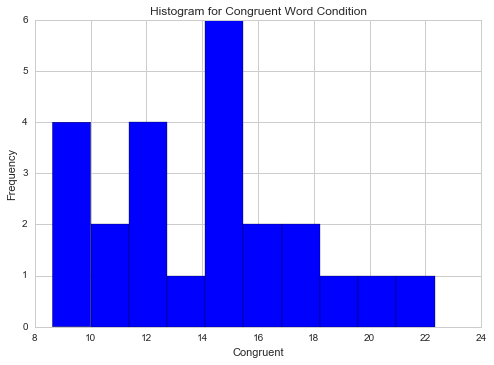

In [10]:
plt.hist(dframe["Congruent"],color="blue")
plt.xlabel("Congruent")
plt.ylabel("Frequency")
plt.title("Histogram for Congruent Word Condition")

The histogram for congruent word condition shows the values are centered between 14 and 15 with the mean of 14.05 and standard deviation of 3.55

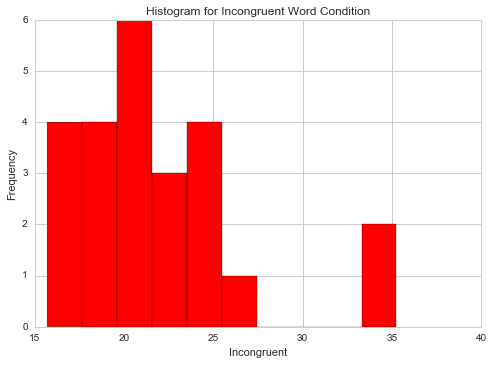

In [11]:
plt.hist(dframe["Incongruent"],color="red")
plt.xlabel("Incongruent")
plt.ylabel("Frequency")
plt.title("Histogram for Incongruent Word Condition")

The histogram for incongruent condition says that values are centered around 22 with the mean of 22.01 with an outlier around 35.The standard deviation is 4.79.

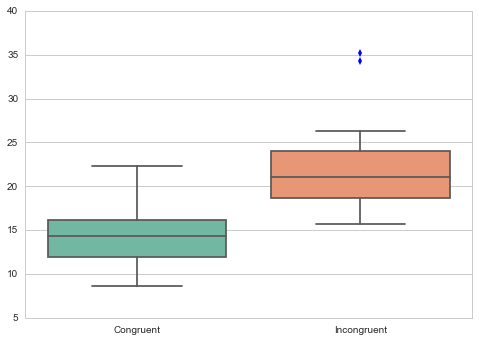

In [12]:
# Plotting a box plot using seaborn library
sns.boxplot(data=dframe,orient="v",palette="Set2")

* The presence of outlier points in Incongruent condition can be clearly seen from the above box plots.
* The median value for congruent condition is lower than Incongruent condition.
* Congruents task have lesser variability in data as confirmed by the spread of the data (IQR value) in the boxplots.


From the above visualizations, Congruent tasks seem to be completed faster than Incongruent tasks.

### Question 5 :Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [13]:
# Taking a glimpse of the dataset again
dframe.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [14]:
# Adding a new column that contains the difference of values between Incongruent and Congruent condition
dframe["Difference"]=dframe["Incongruent"]-dframe["Congruent"]

#Checking the dataset again
dframe.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


**In order to do the hypothesis testing , we need to calculate the mean and standard deviation of the Difference between the word conditions.**

In [81]:
# Calculating the mean and Standard devaition of the Difference column.
PE=dframe["Difference"].mean()     # point estimate for difference in population mean  i.e μinc - μcon
Stdev=dframe["Difference"].std()   # Standard deviation for the sample
Stderr=Stdev/sqrt(24)              # Standard error of the sample

# Calculating the t statistic and the degrees of freedom
t_statistic = (PE-0)/Stderr        # T statistics
df=24-1                            # degrees of freedom = n-1

print "Point Estimate :" , PE
print "Standard Error :", Stderr
print "Test statistic :", t_statistic
print "Degrees of freedom :", df

# Performing the two sided t tests using stats library to get the p value
stats.ttest_rel(dframe["Incongruent"],dframe["Congruent"])

Point Estimate : 7.96479166667
Standard Error : 0.993028634778
Test statistic : 8.02070694411
Degrees of freedom : 23


Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

**The t critical value can be calculated using function from stats library, i.e stats.t.ppf(q,df) or from the [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) **

tcrit = stats.t.ppf(1-a/2,df)

For 95% Confidence Level , α=0.05.
Hence, t critical value can be calculated as :

In [77]:
# getting the t critical value for 95% CI.
tcrit=stats.t.ppf(q=0.975,df=23)    # q=1-0.05/2

# Calculating the Margin of error 
ME=tcrit*Stderr

# 95% Confidence Interval = (PE+ME, PE-ME)
Upperbound = PE + ME
Lowerbound = PE - ME
print "95% Confidence Interval is :", (Lowerbound ,Upperbound)

95% Confidence Interval is : (5.9105554239684226, 10.019027909364912)


Summarizing the above calculations :

* PointEstimate(PE) : 7.96
* StandardError(Stderr) : 0.993
* degrees of freedom(df) : 23
* T critical value(tcrit): -2.06, 2.06
* Test Statistic(t_statistic) : 8.020
* pvalue :4.1030005857111781e-08
* 95% CI : (5.9105554239684226, 10.019027909364912)

### Conclusion:

**At 95% CI, the test statistic(8.020) is greater than t critical value(2.06) and the extremely small pvalue is way too lesser that alpha level(0.05).Hence,we reject the Null hypothesis and favour the alternate one.In other words, we can say that the data provides convincing evidence that there is a significant difference between the population average of time taken to read congruent words and population average of the time taken to read incongruent words.**


The above results of the siginificant difference between the time taken for the two conditions match up to my expectations.Even the results of my stroop task were the same , as I took more time to read incongruent words and read congruent words faster.Normally, people will take different amount of time to read the words in the two conditions.

### References :
* Statistics lessons from Udacity : https://www.udacity.com/course/viewer#!/c-ud134-nd
* Scipy reference documentation : http://docs.scipy.org/doc/scipy-0.16.0/reference/tutorial/stats.html
* Udemy notes on github for data exploration and plotting : http://nbviewer.jupyter.org/github/jmportilla/Udemy-notes
* Lessons learnt from my work on github repository : https://github.com/shrutisingh15/Titanic_Survival-Analysis